In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("../data/togo-dapaong_qc.csv")
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
df.describe()
df.isna().sum()
df.isna().mean().sort_values(ascending=False) * 100  # % nulls


Comments         100.0
GHI                0.0
Timestamp          0.0
DNI                0.0
DHI                0.0
ModB               0.0
ModA               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
Tamb               0.0
WSstdev            0.0
WD                 0.0
BP                 0.0
WDstdev            0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
dtype: float64

In [4]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Drop rows with missing values temporarily for zscore
df_clean = df[columns_to_check].dropna()
z_scores = np.abs(stats.zscore(df_clean))
outliers = (z_scores > 3)

# See how many outliers per column
pd.DataFrame(outliers, columns=columns_to_check).sum()


GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64

In [5]:
for col in columns_to_check:
    median_val = df[col].median()
    df[col] = np.where(np.abs(stats.zscore(df[col].fillna(median_val))) > 3, median_val, df[col])
    df[col] = df[col].fillna(median_val)


In [6]:
df.to_csv("../data/togo_clean.csv", index=False)


c:\Users\cv\Documents\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


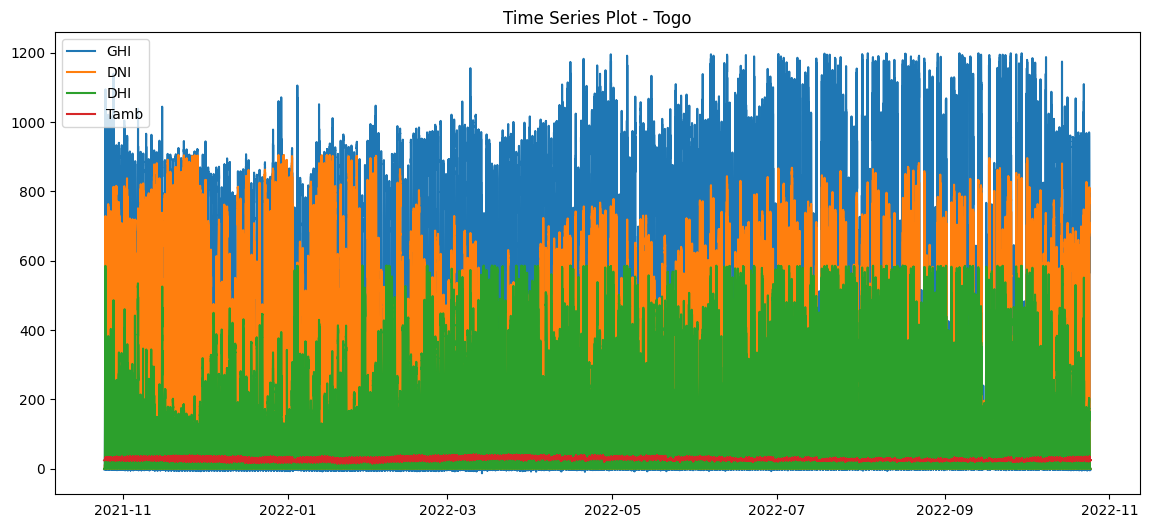

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(14, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df['Timestamp'], df[col], label=col)
plt.legend()
plt.title("Time Series Plot - Togo")
plt.show()


<Axes: xlabel='Cleaning'>

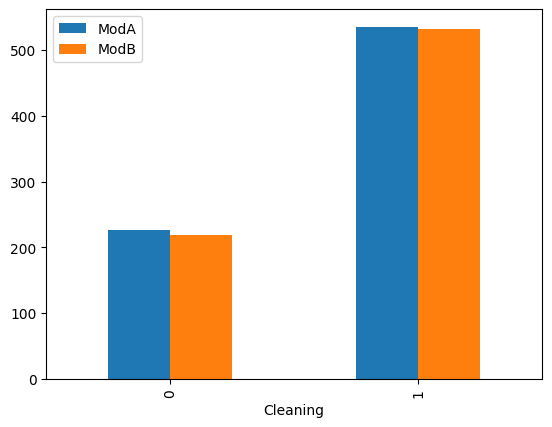

In [8]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')


<Axes: xlabel='Cleaning'>

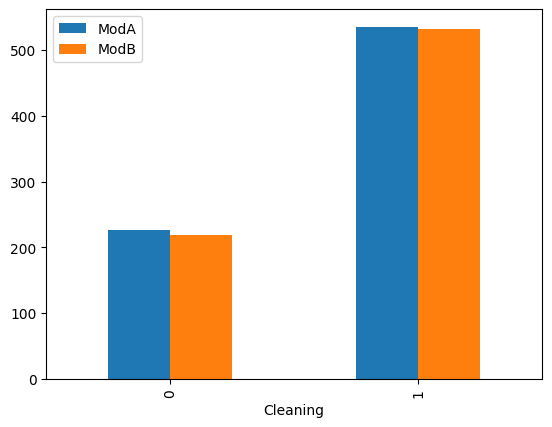

In [9]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')


<Axes: >

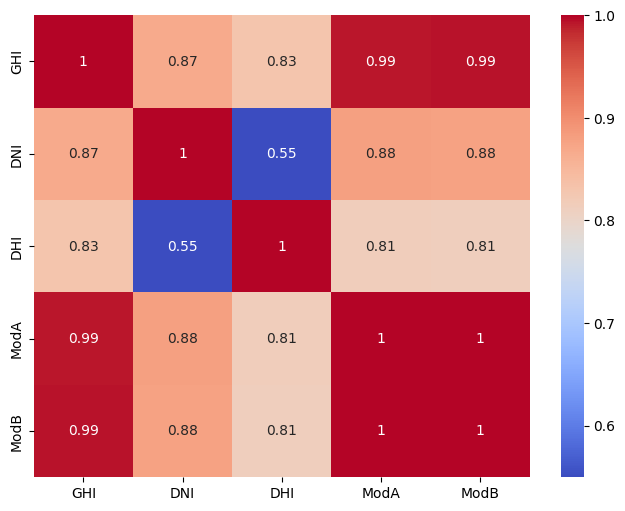

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='WS', ylabel='GHI'>

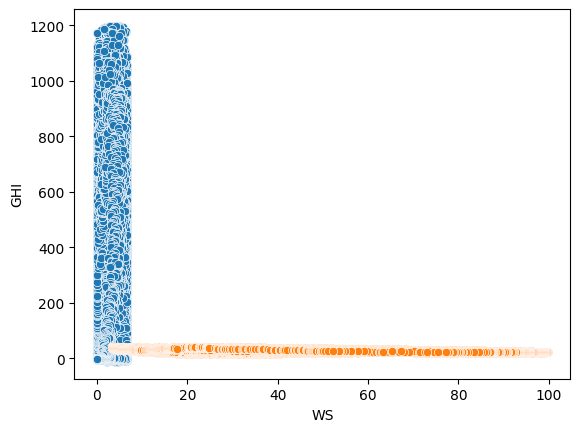

In [11]:
sns.scatterplot(data=df, x='WS', y='GHI')
sns.scatterplot(data=df, x='RH', y='Tamb')


Text(0.5, 1.0, 'GHI Distribution')

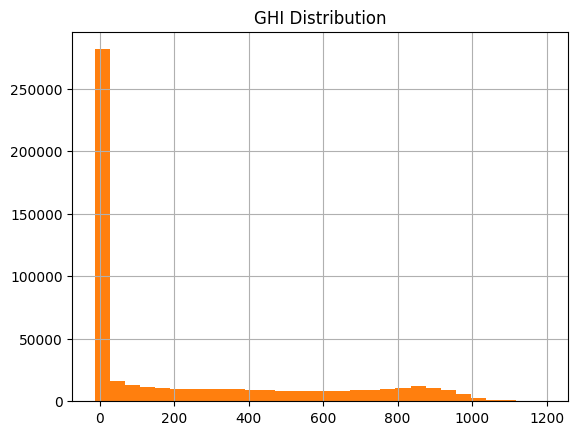

In [12]:
df['WS'].hist(bins=30)
plt.title("Wind Speed Distribution")

df['GHI'].hist(bins=30)
plt.title("GHI Distribution")


Text(0.5, 1.0, 'GHI vs Tamb (Bubble size = RH)')

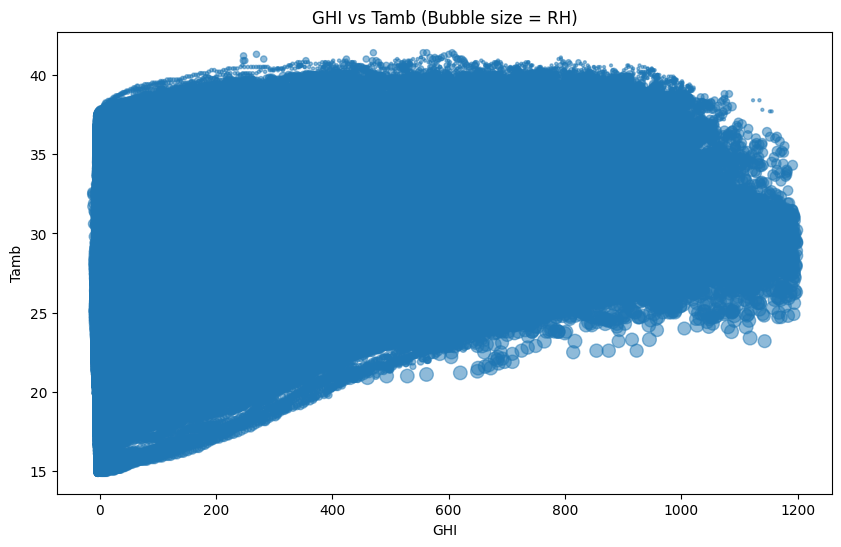

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Tamb (Bubble size = RH)")
